In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from yellowbrick.regressor import ResidualsPlot

In [2]:
df_month = pd.read_parquet('./cleaned_housing_month.parquet')

In [3]:
df_month['target'] = df_month.groupby('area')['average_price'].shift(-1)

In [4]:
df_month = df_month.dropna()

In [5]:
df_month_model = df_month[['area', 'average_price', 'houses_sold', 'target']]

# One hot encoding to numerate area data

df_month_dum = pd.get_dummies(df_month_model)

X = df_month_dum.drop('target', axis=1)
y = df_month_dum.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.592e+05
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        03:42:12   Log-Likelihood:            -1.0285e+05
No. Observations:                9834   AIC:                         2.058e+05
Df Residuals:                    9799   BIC:                         2.060e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1671.5609    367.547     -4.548      0.000   -2392.029    -951.093
average_price                   1.0013      0.001   1735.758      0.000       1.000       1.002
houses_sold                     8.9010      0.841     10.583      0.000       7.252      10.550
area_barking and dagenham     554.4679    501.310      1.106      0.269    -428.204    1537.139
area_barnet                 -1252.6600    496.870     -2.521      0.012   -2226.627    -278.693
area_bexley                  -561.9548    484.656     -1.159      0.246   -1511.981     388.071
area_brent                    108.2538    483.078      0.224      0.823    -838.678    1055.186
area_bromley                -1874.6647    505.278     -3.710      0.000   -2865.113    -884.217
area_camden                  1208.1856    491.078      2.460      0.014     245.572    2170.799
area_city of london          3214.7202    529.343      6.073      0.000    2177.099    4252.341
area_croydon                -1939.8184    501.764     -3.866      0.000   -2923.379    -956.258
area_ealing                  -628.8941    484.234     -1.299      0.194   -1578.092     320.304
area_enfield                 -966.9372    485.667     -1.991      0.047   -1918.944     -14.930
area_greenwich               -277.4196    483.575     -0.574      0.566   -1225.327     670.487
area_hackney                 1045.2405    487.776      2.143      0.032      89.100    2001.381
area_hammersmith and fulham   851.6933    488.911      1.742      0.082    -106.673    1810.060
area_haringey                 511.2676    482.744      1.059      0.290    -435.009    1457.545
area_harrow                   209.7841    483.690      0.434      0.665    -738.348    1157.916
area_havering                -417.9514    483.911     -0.864      0.388   -1366.516     530.613
area_hillingdon              -621.9512    483.238     -1.287      0.198   -1569.197     325.294
area_hounslow                 -38.0842    483.555     -0.079      0.937    -985.952     909.784
area_islington                977.8874    486.064      2.012      0.044      25.102    1930.673
area_kensington and chelsea  1827.9744    541.434      3.376      0.001     766.653    2889.296
area_kingston upon thames     439.7838    484.207      0.908      0.364    -509.362    1388.930
area_lambeth                 -680.4840    487.029     -1.397      0.162   -1635.161     274.193
area_lewisham                -625.1455    484.160     -1.291      0.197   -1574.200     323.909
area_merton                   132.6470    482.074      0.275      0.783    -812.317    1077.611
area_newham                   -99.2586    485.713     -0.204      0.838   -1051.356     852.839
area_redbridge               -533.6861    482.943     -1.105      0.269   -1480.355     412.983
area_richmo

In [6]:
# Linear Regression model

lr = LinearRegression()
lr.fit(X_train, y_train)
ts_cv = TimeSeriesSplit(n_splits=3)

print(np.mean(cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=ts_cv )))

-4121.887009628289


In [7]:
# Storing Predictions of the model

ypred_lr = lr.predict(X_test)

In [8]:
# Testing the prediction

print(mean_absolute_error(y_test, ypred_lr))        # MAE
print((mean_squared_error(y_test, ypred_lr))**0.5)  # RMSE
print(r2_score(y_test, ypred_lr))                   # R2 SCORE

5597.159585982866
8618.438597880784
0.9982696499081931


In [9]:
# Checking coefficients and intercept
cdf = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficients'])
intercept = lr.intercept_
print(cdf)
print(intercept)

                             Coefficients
average_price                    1.000896
houses_sold                      8.777952
area_barking and dagenham      886.977878
area_barnet                   -835.940043
area_bexley                   -202.832834
area_brent                     490.834869
area_bromley                 -1470.623818
area_camden                   1660.361693
area_city of london           3623.212501
area_croydon                 -1553.372607
area_ealing                   -233.134137
area_enfield                  -587.862341
area_greenwich                  88.965621
area_hackney                  1426.394264
area_hammersmith and fulham   1295.749562
area_haringey                  901.667038
area_harrow                    590.771265
area_havering                  -54.073260
area_hillingdon               -243.605458
area_hounslow                  333.281957
area_islington                1389.766503
area_kensington and chelsea   2382.873972
area_kingston upon thames      823

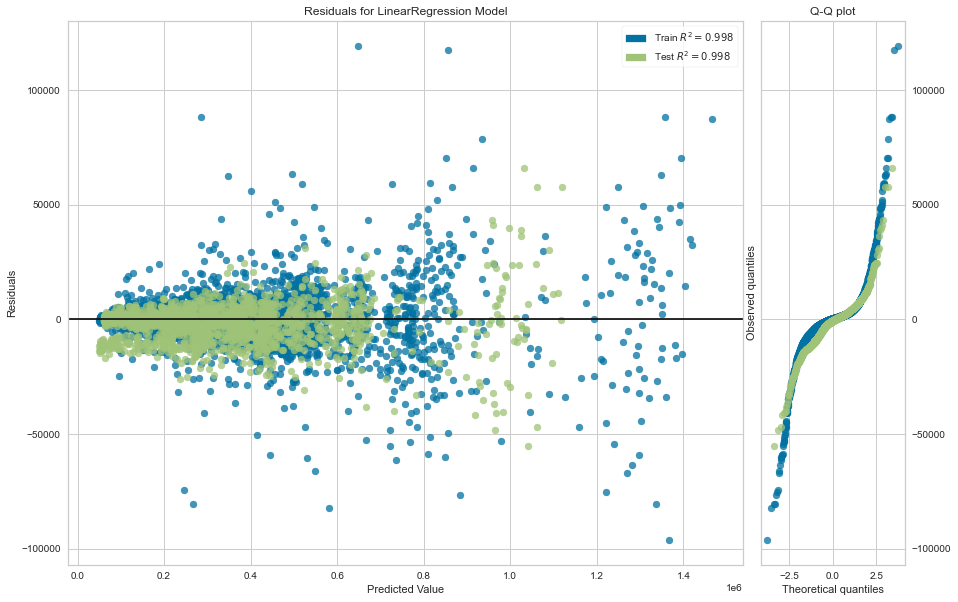

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
# Residual plots to determine heteroscedasticity and whether constant variance is violated

residual = ResidualsPlot(lr, hist=False, qqplot=True, size=(1080,720))

residual.fit(X_train, y_train)
residual.score(X_test, y_test)
residual.show()              

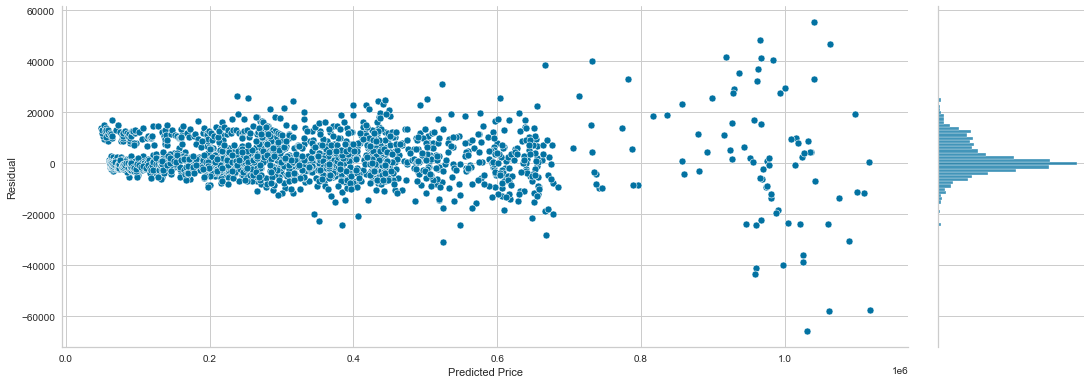

In [11]:
with sns.axes_style('whitegrid'):
    r = sns.jointplot(x=ypred_lr, y=y_test-ypred_lr, height=12)
    r.set_axis_labels('Predicted Price', 'Residual')
    r.fig.set_figwidth(15)
    r.fig.set_figheight(6)
    r.ax_marg_x._visible=False